## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import shutil

train_csv_path = '/content/drive/MyDrive/AML/dataset_meat/train/_classes.csv'  
valid_csv_path = '/content/drive/MyDrive/AML/dataset_meat/valid/_classes.csv'  

train_data = pd.read_csv(train_csv_path)
valid_data = pd.read_csv(valid_csv_path)

train_dir = '/content/drive/MyDrive/AML/dataset_meat/train'
valid_dir = '/content/drive/MyDrive/AML/dataset_meat/valid'

print("Train Data Columns:", train_data.columns)
print("Valid Data Columns:", valid_data.columns)

Train Data Columns: Index(['filename', ' Fresh', ' Half-Fresh', ' Spoiled'], dtype='object')
Valid Data Columns: Index(['filename', ' Fresh', ' Half-Fresh', ' Spoiled'], dtype='object')


In [ ]:
train_data.columns = train_data.columns.str.strip()
valid_data.columns = valid_data.columns.str.strip()

print("Updated Train Data Columns:", train_data.columns)
print("Updated Valid Data Columns:", valid_data.columns)

Updated Train Data Columns: Index(['filename', 'Fresh', 'Half-Fresh', 'Spoiled'], dtype='object')
Updated Valid Data Columns: Index(['filename', 'Fresh', 'Half-Fresh', 'Spoiled'], dtype='object')


In [ ]:
#helper functions to determine category and organize images
def determine_category(row):
    if row['Fresh'] == 1:
        return 'Fresh'
    elif row['Half-Fresh'] == 1:
        return 'Half-Fresh'
    elif row['Spoiled'] == 1:
        return 'Spoiled'
    else:
        return 'Unknown'

def organize_images(base_dir, data):
    for _, row in data.iterrows():
        img_filename = row['filename']
        category = determine_category(row)
        category_dir = os.path.join(base_dir, category)

        if not os.path.exists(category_dir):
            os.makedirs(category_dir)

        img_src_path = os.path.join(base_dir, img_filename)
        img_dest_path = os.path.join(category_dir, img_filename)

        if os.path.exists(img_src_path):
            shutil.move(img_src_path, img_dest_path)
        else:
            print(f"File {img_src_path} not found.")

organize_images(train_dir, train_data)
organize_images(valid_dir, valid_data)

print("Dataset reorganized successfully.")

File /content/drive/MyDrive/AML/dataset_meat/train/SPOILED-207-_JPG.rf.4e9025c18a5ae21defb30242a670ab05.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/SPOILED-261-_JPG.rf.4effa4dd0d8c2fe5579aa5859e7824ea.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/FRESH-202-_JPG.rf.4f13e1b8c1559b63d140d294269709e1.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/FRESH-721-_JPG.rf.4f770a93bd104098aa7ffb172a90a4df.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/FRESH-904-_JPG.rf.4f66185dbff0f068ed39414bfdf1940e.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/SPOILED-647-_JPG.rf.4e097c9eb1b560f8756a83240bbb48b7.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/SPOILED-482-_JPG.rf.4f38b4015618735318ce10a05d2925c6.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/SPOILED-362-_JPG.rf.4f4d1c2b1e7c154ca2225fe80f010f23.jpg not found.
File /content/drive/MyDrive/AML/dataset_meat/train/FRE

In [ ]:
!pip install keras_preprocessing

%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
import os
import gc
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from keras_preprocessing.image import load_img, img_to_array, array_to_img ,ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , GlobalAveragePooling2D

from keras.optimizers import Adam , RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf

from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler , EarlyStopping ,TensorBoard
from keras import optimizers
from keras.models import load_model

from keras.applications.xception import Xception
#from keras.applications import VGG16
from keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

import shutil
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Traditional Models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1815 images belonging to 3 classes.
Found 451 images belonging to 3 classes.


In [ ]:
def train_and_log_accuracy(model, X_train, y_train, X_val, y_val, epochs=20):
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        val_accuracy = accuracy_score(y_val, model.predict(X_val))
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_accuracy:.4f} - Validation Accuracy: {val_accuracy:.4f}')

    return train_accuracies, val_accuracies

X_train = []
y_train = []
for i in range(len(train_generator)):
    x, y = train_generator.next()
    X_train.append(x)
    y_train.append(y)
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

X_val = []
y_val = []
for i in range(len(valid_generator)):
    x, y = valid_generator.next()
    X_val.append(x)
    y_val.append(y)
X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

nb = GaussianNB()
nb_train_accuracies, nb_val_accuracies = train_and_log_accuracy(nb, X_train_flat, y_train, X_val_flat, y_val, epochs=20)

lr = LogisticRegression(max_iter=1000, random_state=2024)
lr_train_accuracies, lr_val_accuracies = train_and_log_accuracy(lr, X_train_flat, y_train, X_val_flat, y_val, epochs=20)

rf = RandomForestClassifier(n_estimators=100, random_state=2024)
rf_train_accuracies, rf_val_accuracies = train_and_log_accuracy(rf, X_train_flat, y_train, X_val_flat, y_val, epochs=20)


Epoch 1/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 2/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 3/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 4/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 5/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 6/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 7/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 8/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 9/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 10/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 11/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 12/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 13/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 14/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoch 15/20 - Train Accuracy: 0.5862 - Validation Accuracy: 0.5920
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 2/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 3/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 4/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 5/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 6/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 7/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 8/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 9/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 10/20 - Train Accuracy: 1.0000 - Validation Accuracy: 0.6319


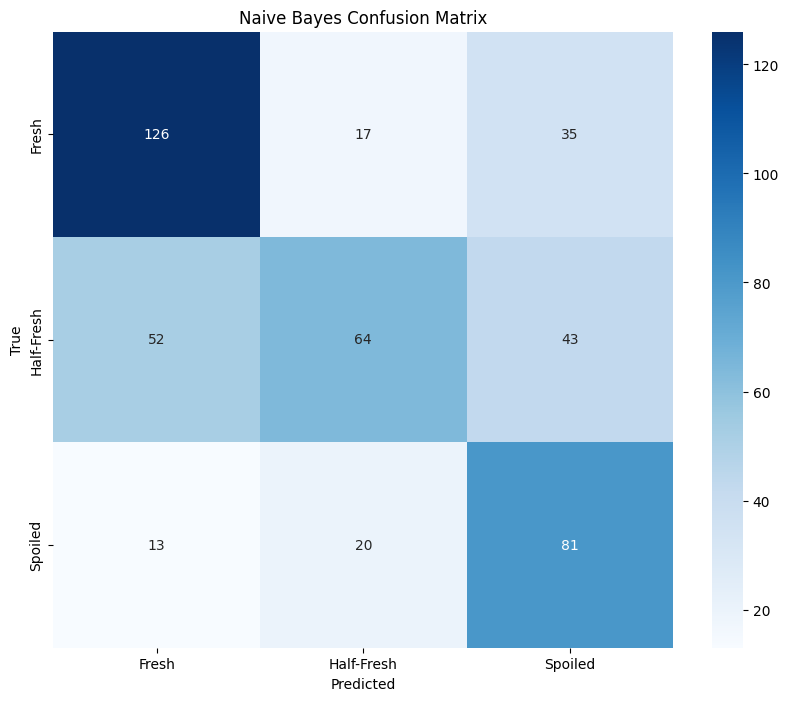

Naive Bayes Classification Report
              precision    recall  f1-score   support

       Fresh       0.66      0.71      0.68       178
  Half-Fresh       0.63      0.40      0.49       159
     Spoiled       0.51      0.71      0.59       114

    accuracy                           0.60       451
   macro avg       0.60      0.61      0.59       451
weighted avg       0.61      0.60      0.59       451



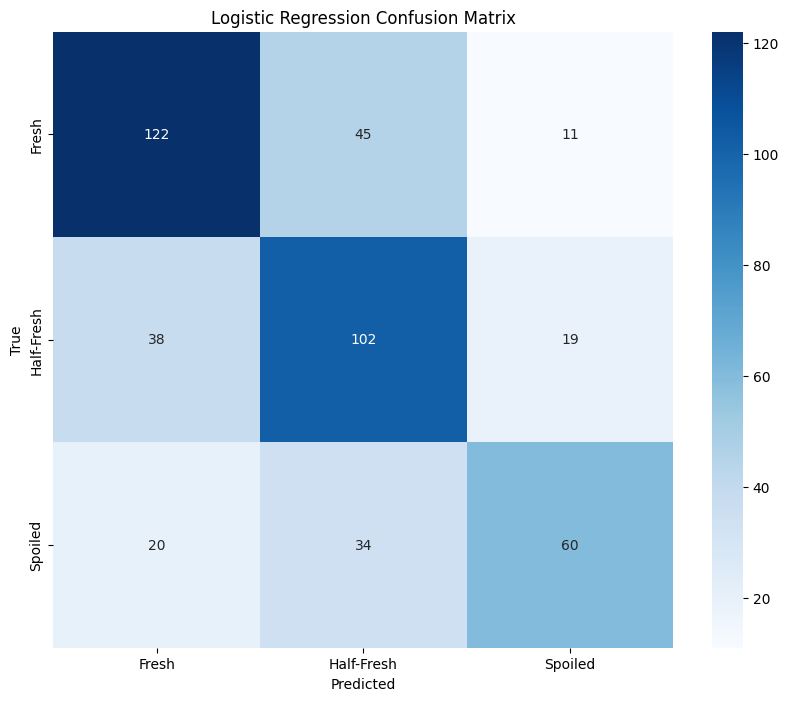

Logistic Regression Classification Report
              precision    recall  f1-score   support

       Fresh       0.68      0.69      0.68       178
  Half-Fresh       0.56      0.64      0.60       159
     Spoiled       0.67      0.53      0.59       114

    accuracy                           0.63       451
   macro avg       0.64      0.62      0.62       451
weighted avg       0.63      0.63      0.63       451



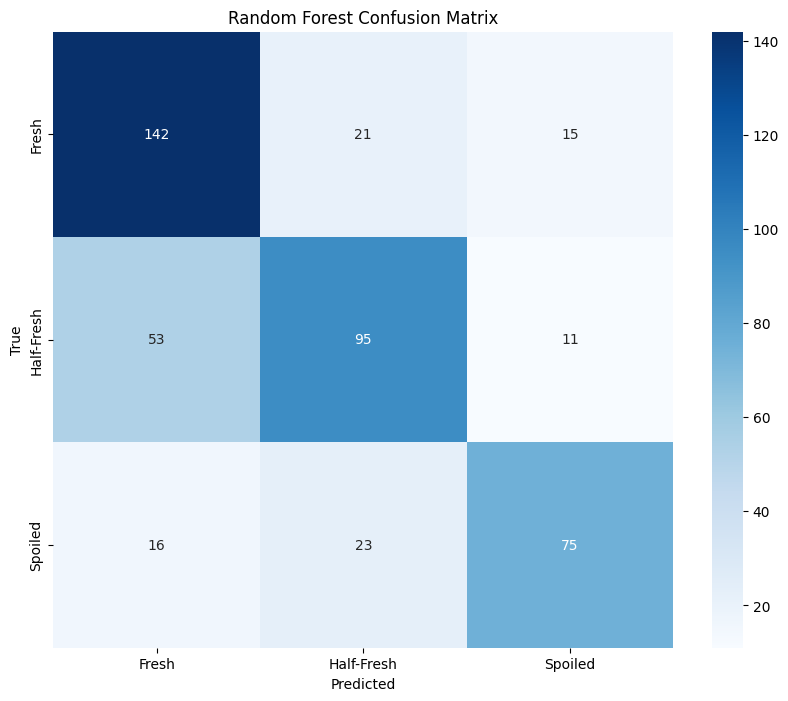

Random Forest Classification Report
              precision    recall  f1-score   support

       Fresh       0.67      0.80      0.73       178
  Half-Fresh       0.68      0.60      0.64       159
     Spoiled       0.74      0.66      0.70       114

    accuracy                           0.69       451
   macro avg       0.70      0.68      0.69       451
weighted avg       0.69      0.69      0.69       451



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def print_classification_report(y_true, y_pred, class_names, title='Classification Report'):
    print(f'{title}')
    print(classification_report(y_true, y_pred, target_names=class_names))

class_names = ['Fresh', 'Half-Fresh', 'Spoiled']

plot_confusion_matrix(y_val, y_pred_nb, class_names, title='Naive Bayes Confusion Matrix')
print_classification_report(y_val, y_pred_nb, class_names, title='Naive Bayes Classification Report')

plot_confusion_matrix(y_val, y_pred_lr, class_names, title='Logistic Regression Confusion Matrix')
print_classification_report(y_val, y_pred_lr, class_names, title='Logistic Regression Classification Report')

plot_confusion_matrix(y_val, y_pred_rf, class_names, title='Random Forest Confusion Matrix')
print_classification_report(y_val, y_pred_rf, class_names, title='Random Forest Classification Report')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    contrast_range=[0.8, 1.2]
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AML/dataset_meat/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/AML/dataset_meat/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[-20:]:
    layer.trainable = True

true_labels = valid_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(true_labels),
    y=true_labels
)

class_weights_dict = dict(enumerate(class_weights))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict  # Use the class weights here
)

model.save('meat_classification_model_with_efficientnet.h5')

predictions = model.predict(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(true_labels, predicted_classes, target_names=valid_generator.class_indices.keys()))


Balanced Training Dataset Counts:
Spoiled: 675 images
Fresh: 675 images
Half-Fresh: 675 images

Balanced Validation Dataset Counts:
Half-Fresh: 178 images
Fresh: 178 images
Spoiled: 178 images
Found 2025 images belonging to 3 classes.
Found 2025 images belonging to 3 classes.
58889256/58889256 [==============================] - 3s 0us/step
Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}
Epoch 1/10
63/63 [==============================] - 923s 14s/step - loss: 1.3307 - accuracy: 0.5479 - val_loss: 27.2552 - val_accuracy: 0.3338 - lr: 1.0000e-04
Epoch 2/10
63/63 [==============================] - 38s 604ms/step - loss: 0.7648 - accuracy: 0.7120 - val_loss: 4.6889 - val_accuracy: 0.5471 - lr: 1.0000e-04
Epoch 3/10
63/63 [==============================] - 38s 602ms/step - loss: 0.6161 - accuracy: 0.7622 - val_loss: 1.0029 - val_accuracy: 0.6543 - lr: 1.0000e-04
Epoch 4/10
63/63 [==============================] - 38s 599ms/step - loss: 0.5909 - accuracy: 0.7647 - val_loss: 1.9439 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 9s 137ms/step


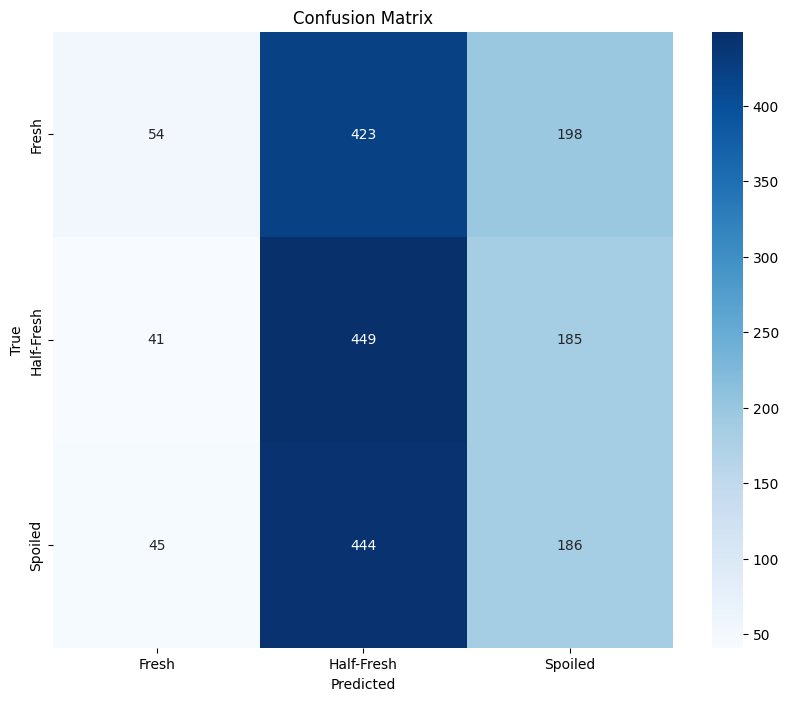

Classification Report
              precision    recall  f1-score   support

       Fresh       0.39      0.08      0.13       675
  Half-Fresh       0.34      0.67      0.45       675
     Spoiled       0.33      0.28      0.30       675

    accuracy                           0.34      2025
   macro avg       0.35      0.34      0.29      2025
weighted avg       0.35      0.34      0.29      2025



In [ ]:
import os
import shutil
from sklearn.utils import compute_class_weight
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def count_images(directory):
    """
    Count the number of images in each class directory.
    """
    category_counts = {}
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_counts[category] = len(os.listdir(category_path))
    return category_counts

def balance_dataset(directory):
    """
    Balance the dataset by oversampling the minority class.
    """
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            class_counts[class_name] = len(os.listdir(class_path))

    max_count = max(class_counts.values())

    for class_name, count in class_counts.items():
        class_dir = os.path.join(directory, class_name)
        if count < max_count:
            files = os.listdir(class_dir)
            for i in range(max_count - count):
                file_to_copy = random.choice(files)
                new_file = f"{os.path.splitext(file_to_copy)[0]}_copy{i}{os.path.splitext(file_to_copy)[1]}"
                while os.path.exists(os.path.join(class_dir, new_file)):
                    i += 1
                    new_file = f"{os.path.splitext(file_to_copy)[0]}_copy{i}{os.path.splitext(file_to_copy)[1]}"
                shutil.copy(os.path.join(class_dir, file_to_copy), os.path.join(class_dir, new_file))

balance_dataset('/content/drive/MyDrive/AML/dataset_meat/train')
balance_dataset('/content/drive/MyDrive/AML/dataset_meat/valid')

train_counts = count_images('/content/drive/MyDrive/AML/dataset_meat/train')
valid_counts = count_images('/content/drive/MyDrive/AML/dataset_meat/valid')

print("Balanced Training Dataset Counts:")
for category, count in train_counts.items():
    print(f"{category}: {count} images")

print("\nBalanced Validation Dataset Counts:")
for category, count in valid_counts.items():
    print(f"{category}: {count} images")

balance_dataset('/content/drive/MyDrive/AML/dataset_meat/train')
balance_dataset('/content/drive/MyDrive/AML/dataset_meat/valid')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AML/dataset_meat/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/AML/dataset_meat/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[-8:]:
    layer.trainable = True

# Compute class weights
true_labels = valid_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(true_labels),
    y=true_labels
)

class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate reduction on plateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict  # Use the class weights here
)

model.save('meat_classification_model_with_class_weights.h5')

predictions = model.predict(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report')
print(classification_report(true_labels, predicted_classes, target_names=valid_generator.class_indices.keys()))


In [ ]:
import os

def delete_oversampled_images(directory):
    """
    Delete images with '_copy' in their filenames from the given directory.
    """
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if '_copy' in filename:
                    file_path = os.path.join(class_path, filename)
                    os.remove(file_path)
                    print(f"Deleted {file_path}")

train_dir = '/content/drive/MyDrive/AML/dataset_meat/train'
valid_dir = '/content/drive/MyDrive/AML/dataset_meat/valid'

# Delete oversampled images
delete_oversampled_images(train_dir)
delete_oversampled_images(valid_dir)

Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-629-_JPG.rf.89943b3826a6eba5d15f74ee020e872c_copy0.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-739-_JPG.rf.da12f38ffe1a3a004112290562b4dede_copy1.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-721-_JPG.rf.fc1a8292a0d6fa025fdfcac84bf5b360_copy2.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-550-_JPG.rf.e6527cab819ed50c3b91a55c9676ac99_copy3.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-327-_JPG.rf.df7aaaa5ac91c05f020cea6118cd56c0_copy4.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-245-_JPG.rf.9b711c86c1142a8bbcb1682a1f8dadad_copy5.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-306-_JPG.rf.c97045698def759193405a29a708152d_copy6.jpg
Deleted /content/drive/MyDrive/AML/dataset_meat/train/Spoiled/SPOILED-306-_JPG.rf.c97045698def759193405a29a708152d_copy7.jpg
